<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



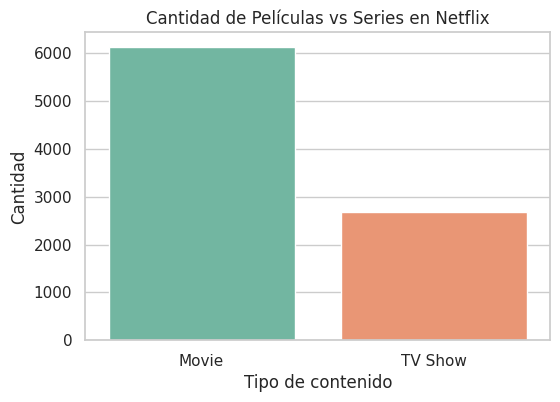

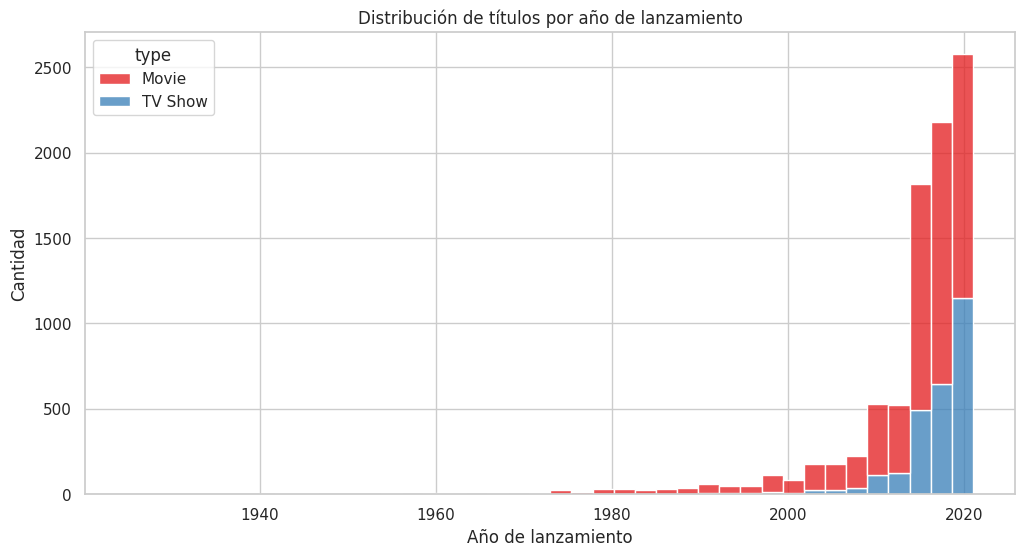

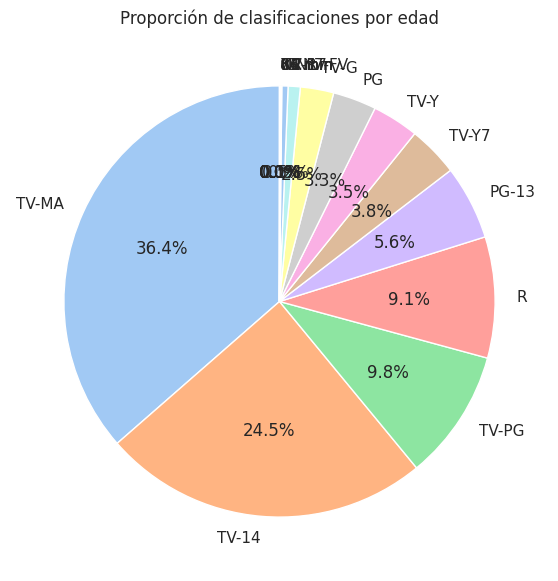

In [8]:
#1.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", hue="type", palette="Set2", legend=False)
plt.title("Cantidad de Películas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()

#Notamos que lo que predomina en netflix son las películas.
#A diferencia de las series, que requieren más tiempo de seguimiento, las películas permiten
#ver historias completas en una sola sesión.

2.
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="release_year", bins=40, hue="type", multiple="stack", palette="Set1")
plt.title("Distribución de títulos por año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad")
plt.show()

#El contenido se concentra en los últimos 20 años. Hay muy poco contenido clásico (anterior a 1970).
#Esto muestra que Netflix apuesta más por contenido reciente y moderno.

3.
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proporción de clasificaciones por edad")
plt.show()

#Las clasificaciones TV-MA (adultos) y TV-14 (adolescentes) son las más comunes.
#Esto sugiere que Netflix se enfoca en público adulto y juvenil, más que en contenido infantil.




## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3393046669.py:41: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)


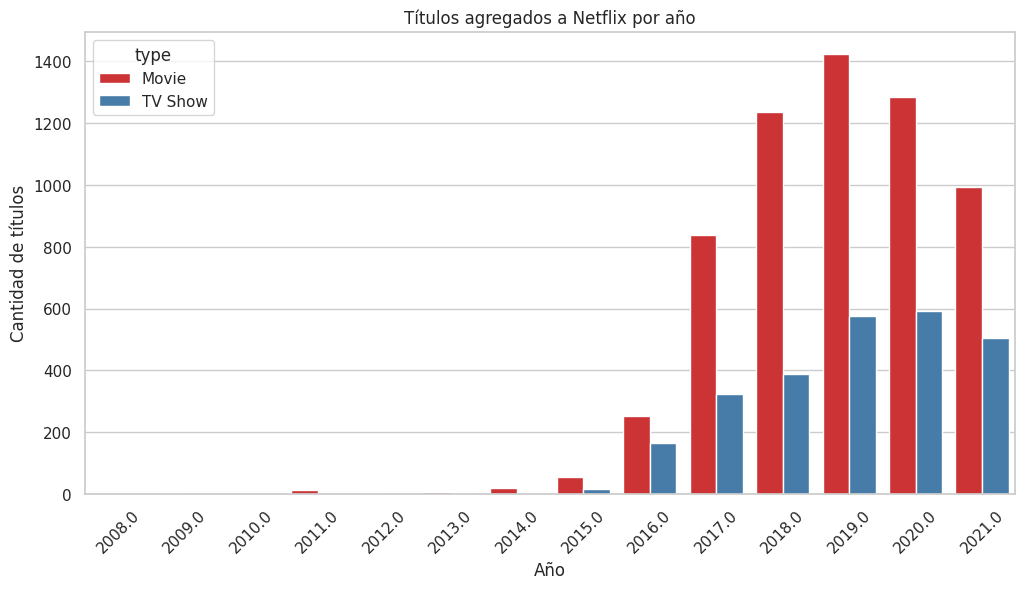

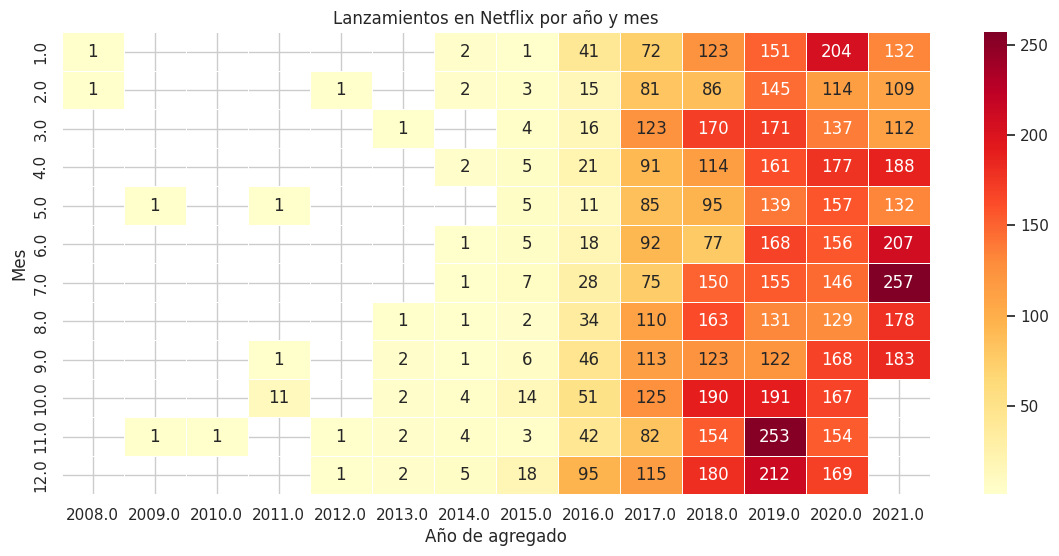

/tmp/ipython-input-3393046669.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_movies, x="main_genre", y="duration_int", palette="Set3")


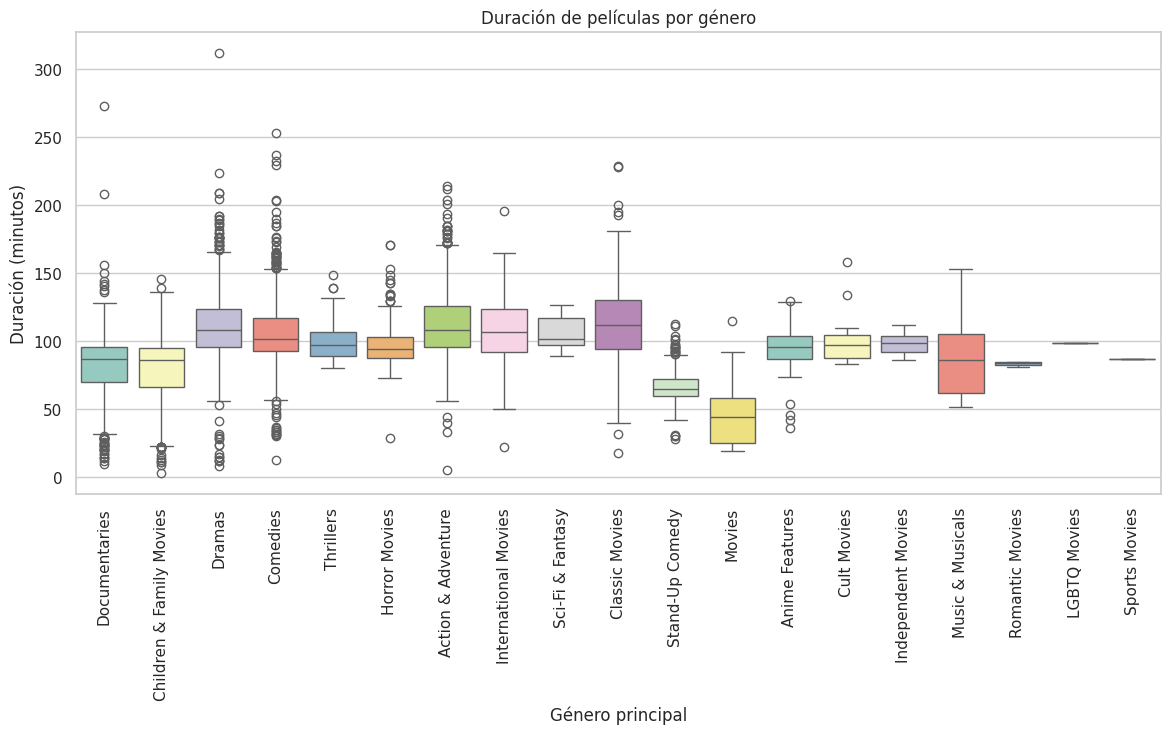

In [14]:
4.
# Convertir a fecha
df['date_added'] = pd.to_datetime(df['date_added'], errors="coerce")

# Extraer año y mes
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year_added", hue="type", palette="Set1")
plt.title("Títulos agregados a Netflix por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()

#El catálogo creció fuertemente después de 2015–2016,
#coincidiendo con la expansión internacional de Netflix y la apuesta por contenido original.


5.
# Tabla de frecuencia
heatmap_data = df.pivot_table(index="month_added", columns="year_added", values="show_id", aggfunc="count")

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f")
plt.title("Lanzamientos en Netflix por año y mes")
plt.xlabel("Año de agregado")
plt.ylabel("Mes")
plt.show()

#Hay meses con picos claros de estrenos, por ejemplo hacia fin de año (octubre-diciembre),
#lo que puede relacionarse con vacaciones y temporadas festivas.
#También se notan patrones de acumulación en ciertos meses, lo que sugiere cierta estacionalidad en los lanzamientos.


6.
# Extraer duración en minutos (solo películas)
df_movies = df[df['type']=="Movie"].copy()
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Tomar el primer género
df_movies['main_genre'] = df_movies['listed_in'].str.split(',').str[0]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_movies, x="main_genre", y="duration_int", palette="Set3")
plt.title("Duración de películas por género")
plt.xlabel("Género principal")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=90)
plt.show()

#Géneros como Documentaries tienden a ser más cortos, mientras que Dramas y International Movies muestran mayor duración.




## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-164221317.py:44: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)


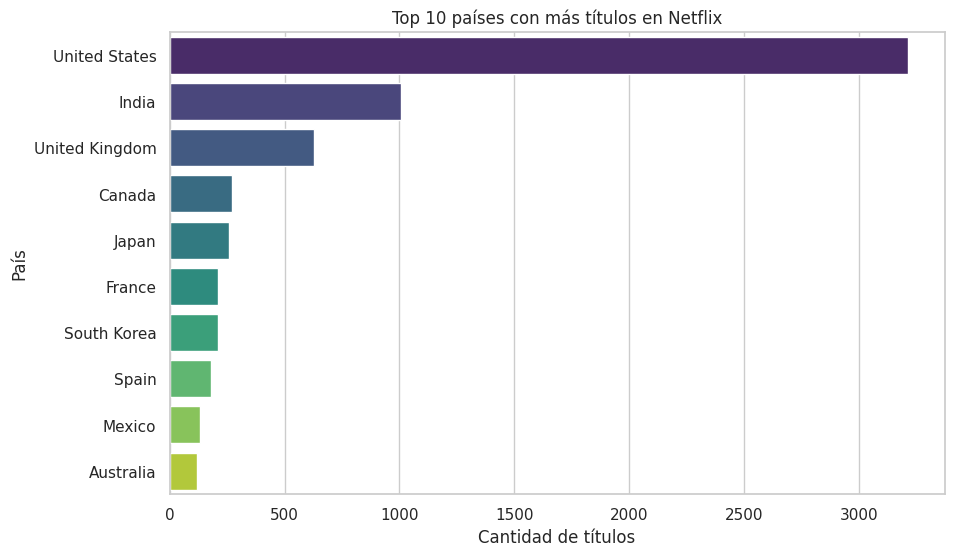

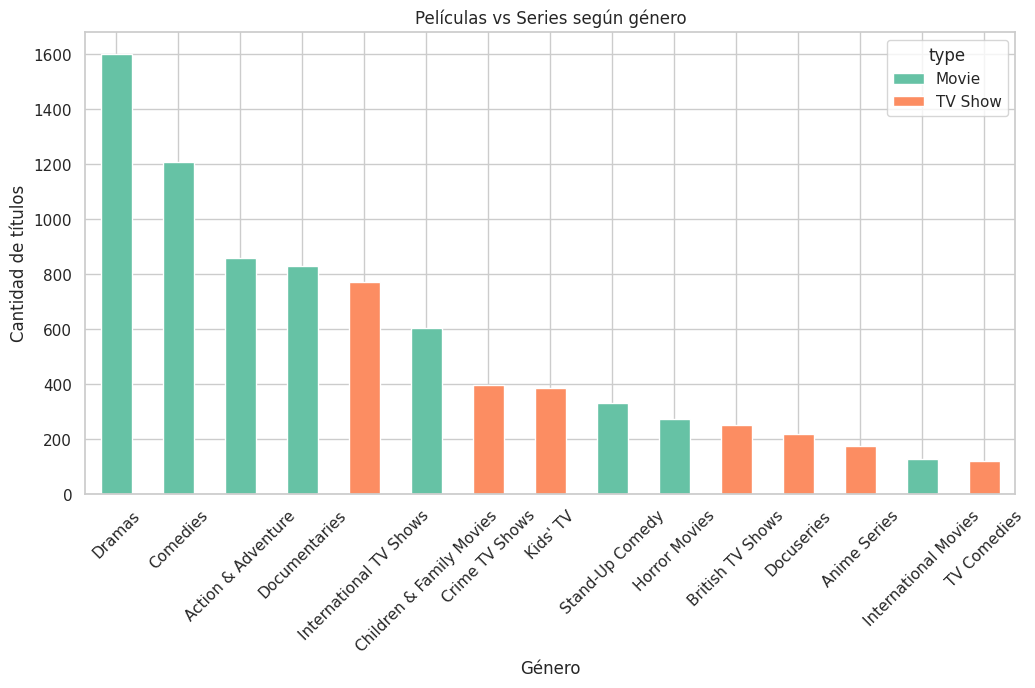

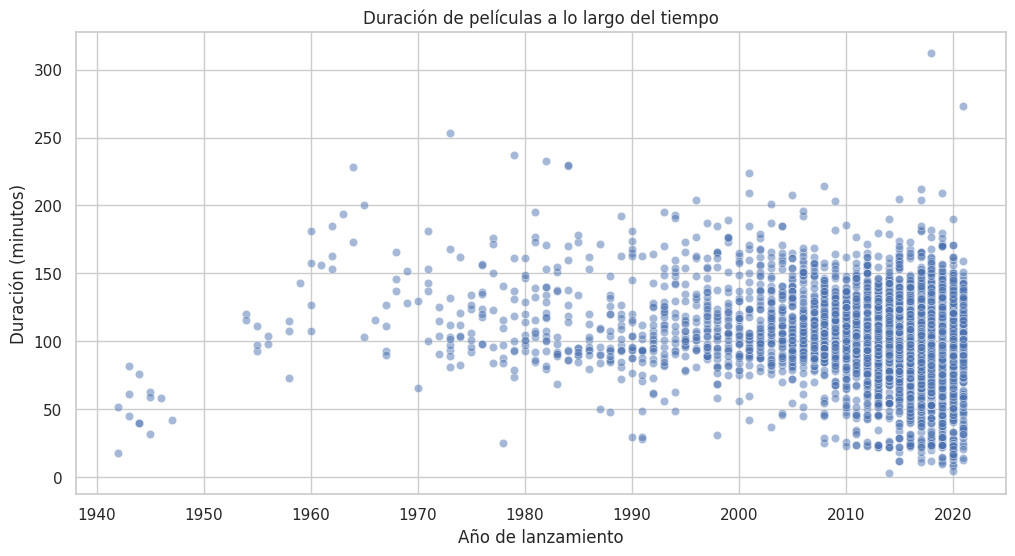

In [19]:
7.
# Separar el primer país de la lista (muchos tienen varios)
df['main_country'] = df['country'].str.split(',').str[0]

top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 países con más títulos en Netflix")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.show()


#Estados Unidos domina el catálogo, seguido por India y algunos otros países.
#No sorprende demasiado ya que EEUU tiene la mayor industria de entretenimiento

8.
genre_type['Total'] = genre_type['Movie'] + genre_type['TV Show']

top_genres = genre_type.sort_values(by='Total', ascending=False).head(15)

top_genres[['Movie','TV Show']].plot(
    kind="bar", stacked=True, figsize=(12,6), color=["#66c2a5", "#fc8d62"]
)

plt.title("Películas vs Series según género")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()
#Géneros como Documentaries y Dramas están más asociados a películas.
#Kids TV y TV Dramas aparecen más en el lado de series.

9.
df_movies = df[df['type']=="Movie"].copy()
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_movies, x="release_year", y="duration_int", alpha=0.5)
plt.title("Duración de películas a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.show()

#No se observa una tendencia fuerte en la duración: la mayoría sigue entre 80–120 minutos, tanto antes como ahora.
#Sí aparecen algunos outliers (películas de más de 300 min → probablemente documentales largos o registros teatrales).

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

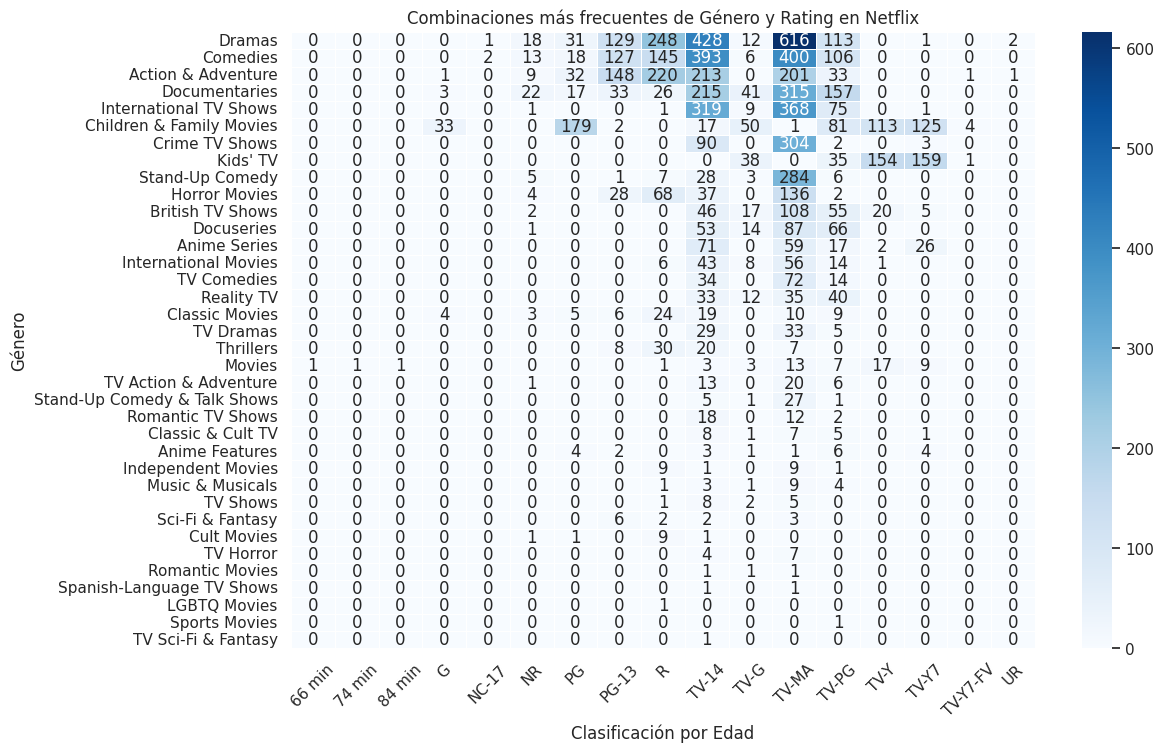

In [21]:

df['main_genre'] = df['listed_in'].str.split(',').str[0]
df_filtered = df.dropna(subset=['rating', 'main_genre'])
genre_rating_counts = df_filtered.groupby(['main_genre', 'rating']).size().unstack(fill_value=0)
genre_rating_counts = genre_rating_counts.loc[genre_rating_counts.sum(axis=1).sort_values(ascending=False).index]


plt.figure(figsize=(12, 8))
sns.heatmap(genre_rating_counts, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Combinaciones más frecuentes de Género y Rating en Netflix')
plt.xlabel('Clasificación por Edad')
plt.ylabel('Género')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#Géneros como Dramas, Thrillers y Comedias suelen tener una mayor presencia en clasificaciones como 'TV-MA' y 'R',
#indicando que están orientados a un público adulto.

